# API Exercise

## Brazilian National Consumer Price Index - IPCA

### January 2010 - December 2016

In [2]:
import requests
import pandas as pd 
from datetime import datetime

In [3]:
# get the response from BACEN API
response = requests.get('http://api.bcb.gov.br/dados/serie/bcdata.sgs.16121/dados?formato=json&dataInicial=01/01/2010&dataFinal=31/12/2016')
print(response.status_code)

200


In [4]:
# build a Dataframe from the json file response
df_ipca = pd.DataFrame(response.json())
df_ipca.head(5)

,data,valor
0,01/01/2010,0.59
1,01/02/2010,0.68
2,01/03/2010,0.42
3,01/04/2010,0.42
4,01/05/2010,0.56


In [5]:
# get data types
df_ipca.dtypes

data     object
valor    object
dtype: object

In [6]:
df_ipca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   data    84 non-null     object
 1   valor   84 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


In [7]:
# change column names
df_ipca.columns = ['date','value']
df_ipca.head(5)

,date,value
0,01/01/2010,0.59
1,01/02/2010,0.68
2,01/03/2010,0.42
3,01/04/2010,0.42
4,01/05/2010,0.56


In [8]:
# cast the date values to datetime and value values to float64
df_ipca.date = df_ipca.date.astype('datetime64[ns]')
df_ipca.value = df_ipca.value.astype('float64')
df_ipca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    84 non-null     datetime64[ns]
 1   value   84 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.4 KB


<AxesSubplot:xlabel='date'>

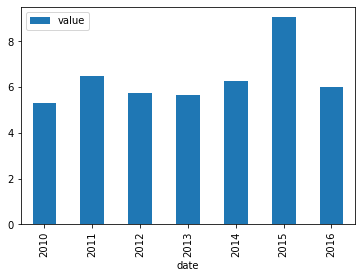

In [13]:
# get annual inflation by year
df_ipca.groupby(df_ipca.date.dt.year).sum().plot(kind='bar')